## To-do list
- metrics functions
- check for directories structure (model for prediction, databases, saving directory for the drawdown/VaR/etc plots, backup directory for model, backup directory for plots)
- import metrics (VaR, cVaR, drawdown, etc.) functions from metrics module
- functions module maybe?
- Binance access and etc (copy from Touring)
- Copy keys.py explanation from Touring
- Two main fund strategies: (1) passive - trade on 1st of each month, keep in basked the 10 crytpos with the most market cap; (2) active - trade every week based on predicted returns for the next week
- Let the user define how many assets to invest into


In [1]:
#------ Import basic packages
#import matplotlib.pyplot as plt
#import seaborn as sns
#import smtplib  # Needed for the e-mail reports
#import binance.enums  # Responsible for trading

#import numpy as np
import pandas as pd
#import pandas_ta
from functions import *
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [ ]:
#from metrics import mvcriterion, optim_mvcrit

#wallet = binance_wallet()

params = {'days':365*2,
          'interval':'1d',
          'rsi':20,
          'bbands':20,
          'roll':13}

data = fetch_data(**params)

clusters = estimate_kmeans(data.rsi, cutoff=0.1)

data = data.dropna().groupby('time', group_keys=False).apply(clustering, **kwargs=['cutoff':0.1])

Checking for trading pairs...
The resources directory exists, checking for trade pairs file.
Trading pairs file 'pairs_202507.csv' found, checking version.
Trading pairs file is up to date.
Loading pairs.
Pairs successfully loaded.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All done.
Requesting informations from Binance.
Request successful. Splitting data...
All 

In [ ]:
#data.drop('cluster_num', axis=1, inplace=True)


params = {'cutoff':0.1,
          'graph':False}
data = data.dropna().groupby('time', group_keys=False).apply(clustering, **params)

KeyError: "['cluster_num'] not found in axis"

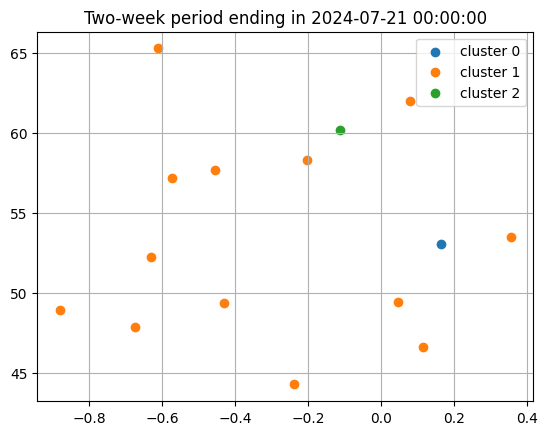

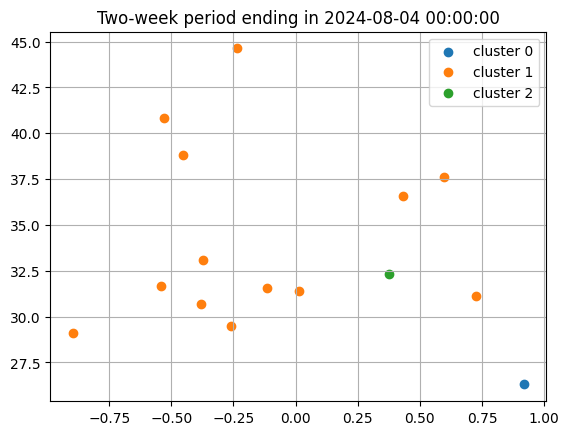

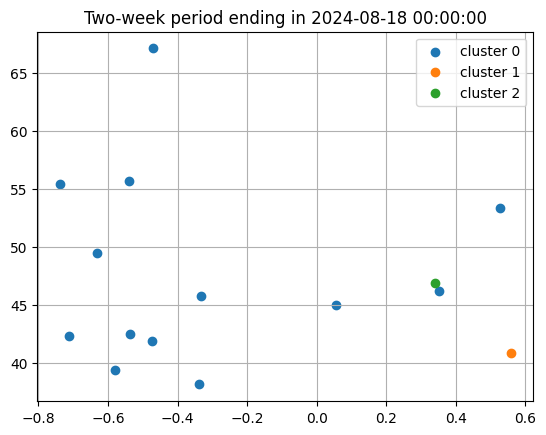

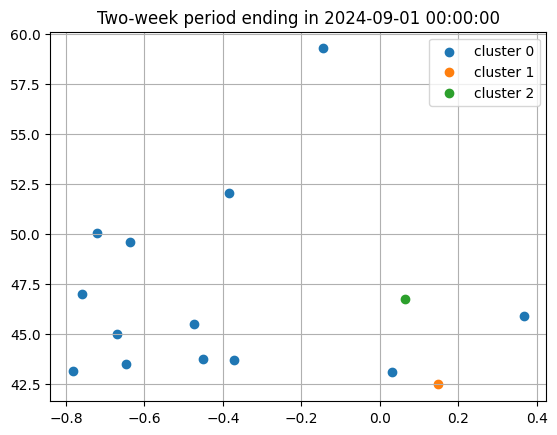

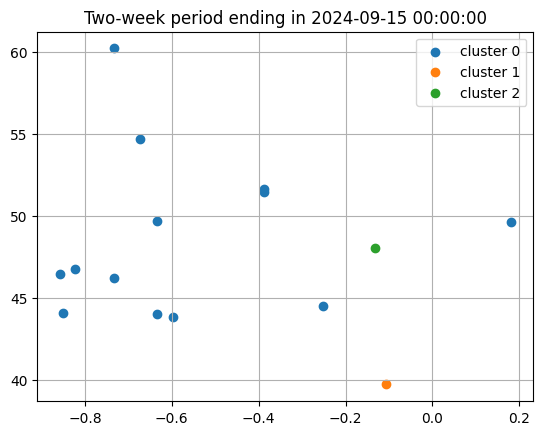

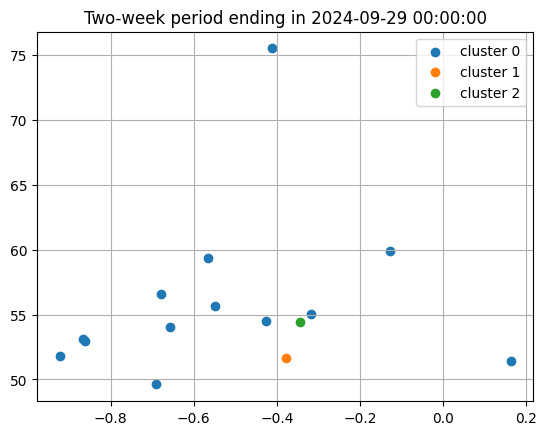

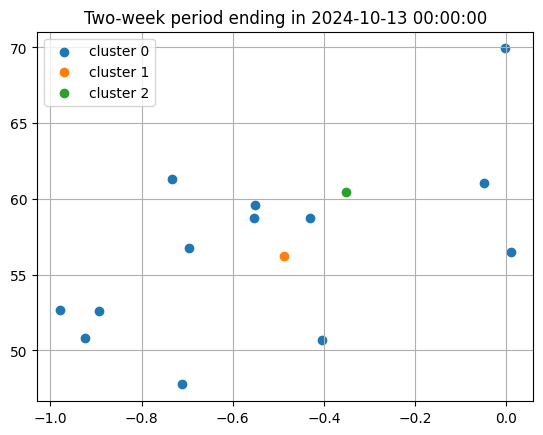

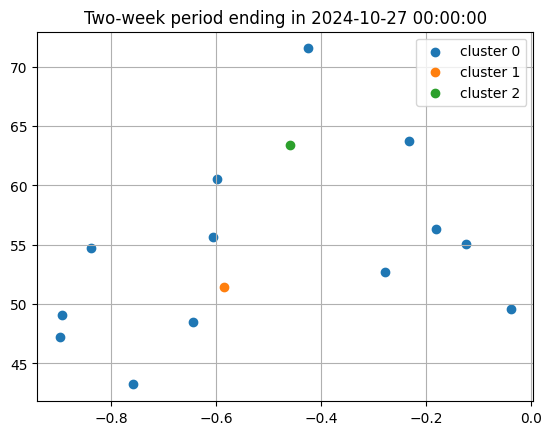

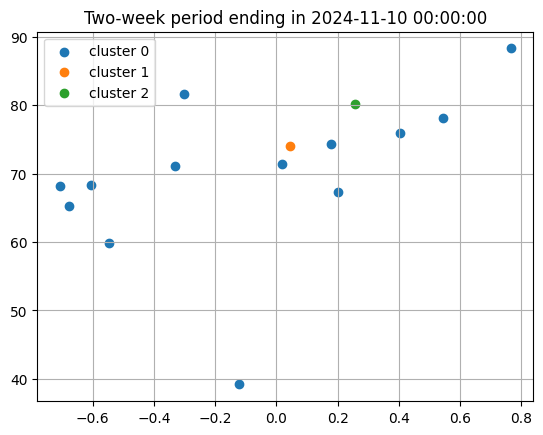

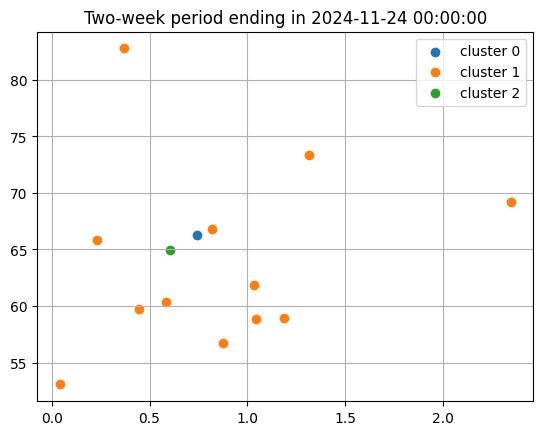

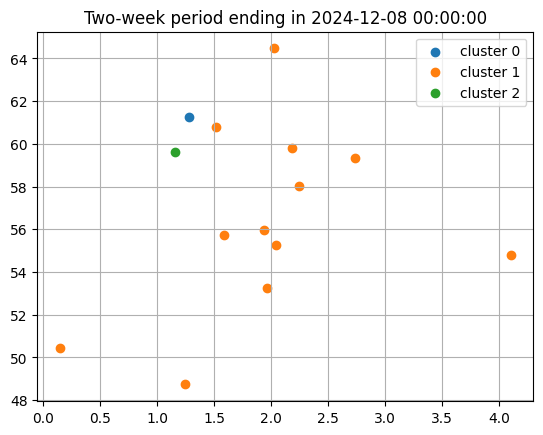

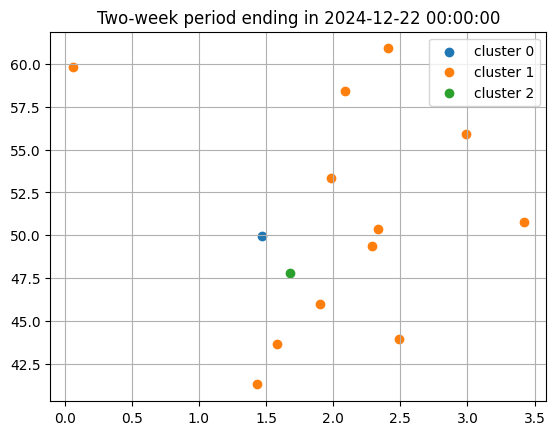

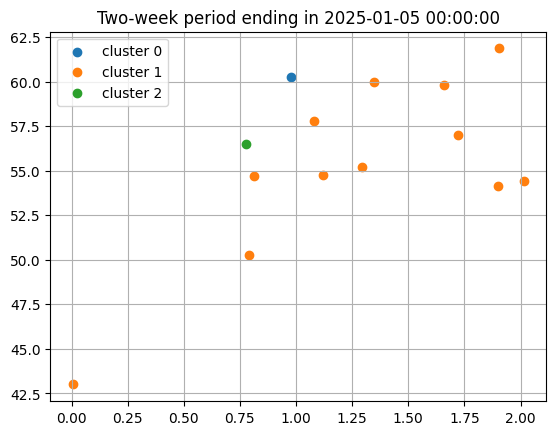

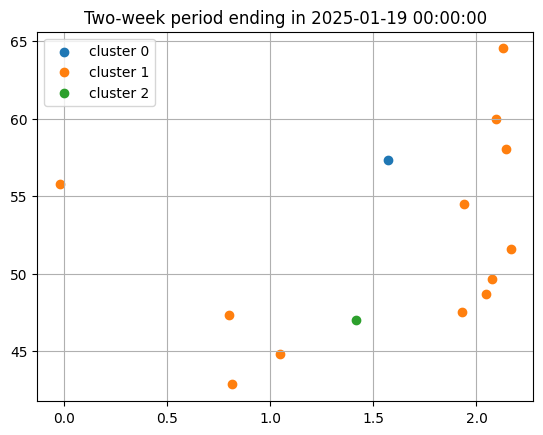

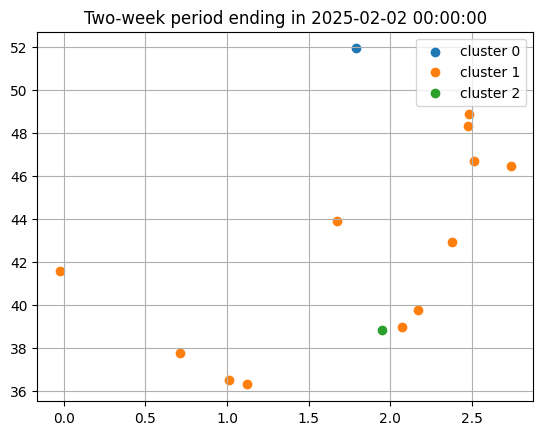

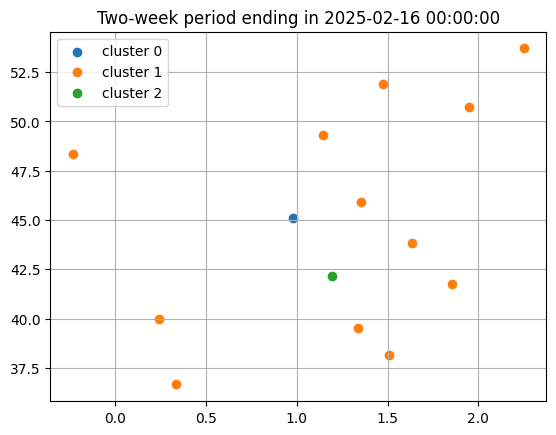

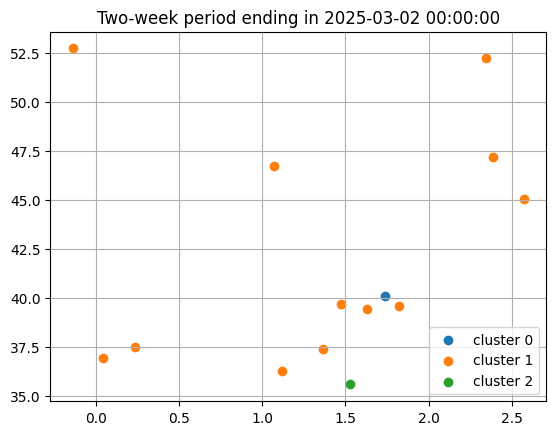

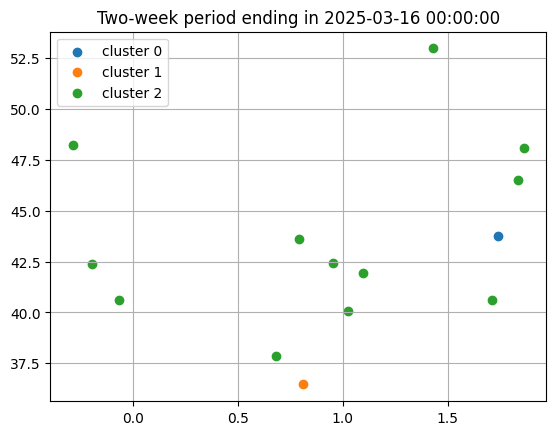

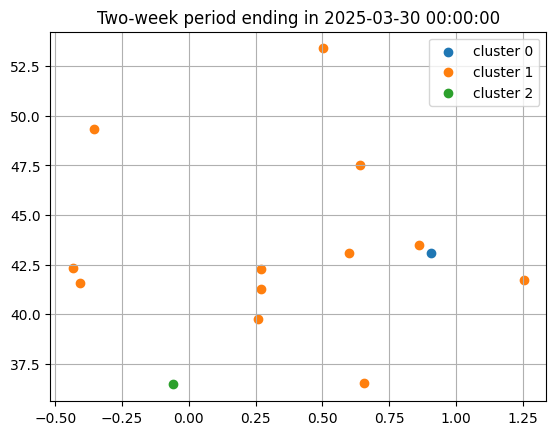

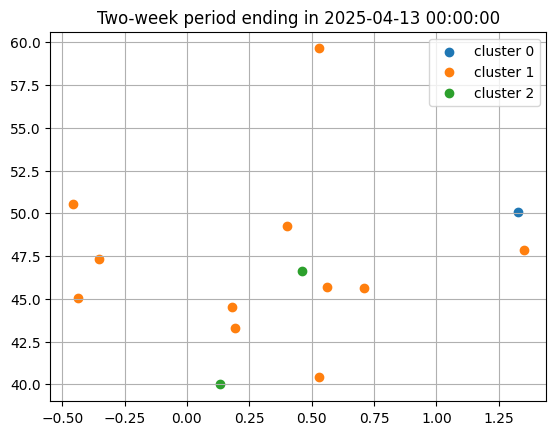

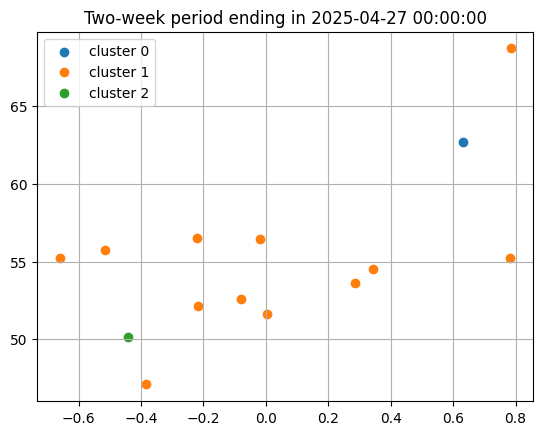

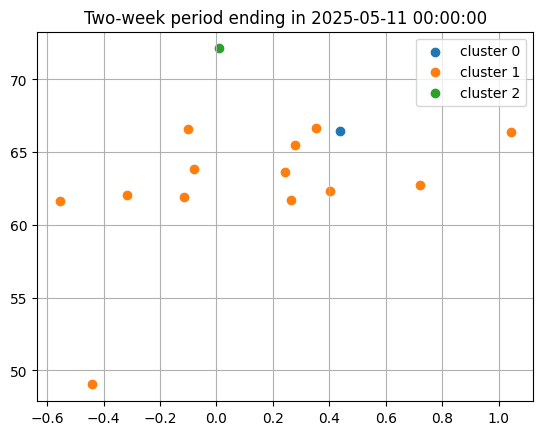

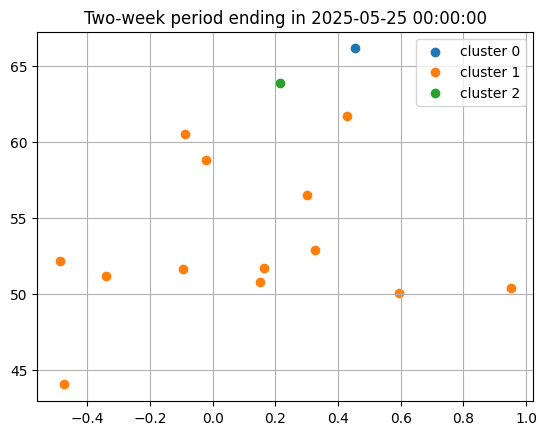

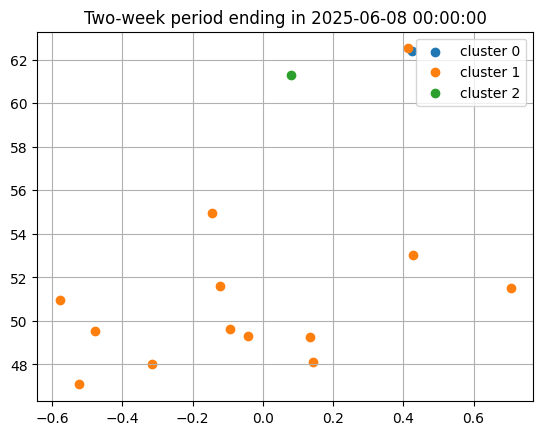

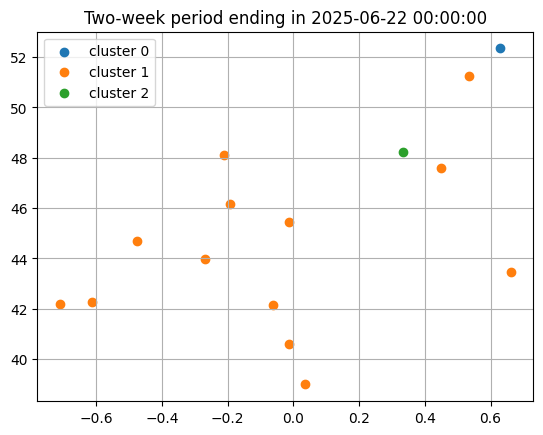

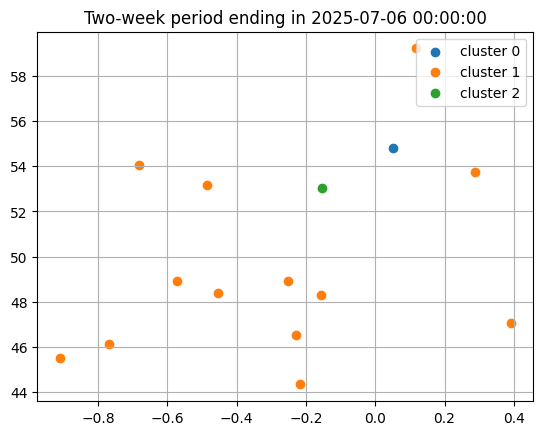

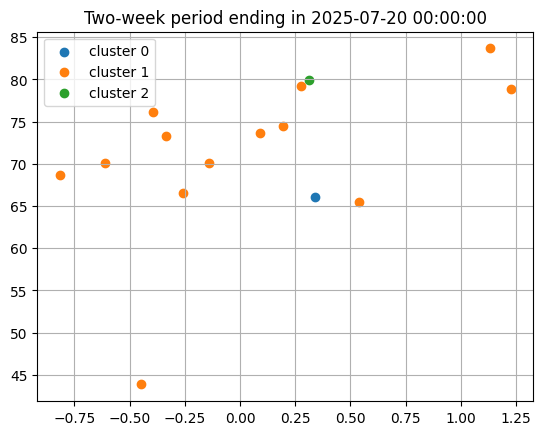

In [228]:
for i in data.index.get_level_values('time').unique().to_list():
    g = data.xs(i, level=0)
    plt.title(f'Two-week period ending in {i}')
    plot_clusters(g, title=False)

In [12]:
#------ Function to estimate the optimal k value for clustering
def clustering(df, max_k=10, cutoff=0.125, graph=False):
    """
    Description: estimates the optimal k value for clustering based on a cutoff value

    Input: df (pandas Series or DataFrame), the values to perform the clustering analysis;
            max_k (int), the maximum number of clusters. Defaults to 10;
            cutoff (float), the percentage (in decimals) in change to evaluate. Defaults to 0.125;
            graph (bool), whether plot a graph or not. Defaults to False

    Output (conditional): df (pandas DataFrame), a clustered dataset
    """
    from sklearn.cluster import KMeans
    import pandas as pd
    
    # Creates empty lists to store mean and intertia values
    means = []
    inertias = []

    # Cycle through data to calculate means and inertias 
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pd.DataFrame(df))

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Creates a pandas DataFrame with the results
    calc = pd.DataFrame([means, inertias], index=['Means', 'Inertia']).T

    # Checks which inertias are under the cutoff value and defines the best k under this assumption
    mask = (calc.Inertia / calc.Inertia[0]) < cutoff
    opt_k = int(calc[mask].Means.min()) - 1
    
    if cutoff != 0.125:
        print(f'Theoretical best k: {opt_k}, with change cutoff {cutoff}')
    else:
        print(f'Theoretical best k: {opt_k}, with default change cutoff value {cutoff}')

    # Plot the elbow graph if graph param is set to True
    if graph == True:
        import matplotlib.pyplot as plt

        fig = plt.subplots(figsize=(10,5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()
        print(f'WARNING! Clustering not registered in the dataset. For it to be done, use hyperparameter "graph=False".')

    else:
        df['cluster_num'] = KMeans(n_clusters=opt_k,
                            random_state=42,
                            init='random').fit(df).labels_
    
        return df

In [35]:
#data.drop('cluster_num', axis=1, inplace=True)
#data = clustering(data, cutoff=0.01)

data.cluster_num.value_counts()

cluster_num
3    150
1    135
0     81
2     27
Name: count, dtype: int64

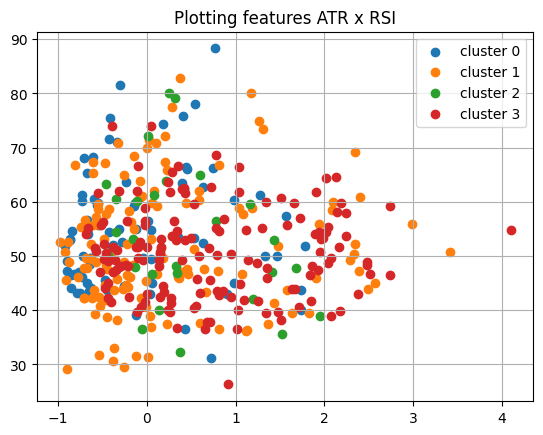

In [36]:
plot_clusters(data)

### Down here is the original functions to estimate k and to perform the clustering:

In [ ]:
#------ Function to estimate the optimal k value for clustering
def estimate_kmeans(data, max_k=10, cutoff=0.125, graph=False):
    """
    Description: estimates the optimal k value for clustering based on a cutoff value

    Input: days (pandas Series or DataFrame), the values to perform the clustering analysis;
            max_k (int), the maximum number of clusters. Defaults to 10;
            cutoff (float), the percentage (in decimals) in change to evaluate. Defaults to 0.125;
            graph (bool), whether plot a graph or not. Defaults to False

    Output: opt_k (int), the theorical optimum value of k
    """
    from sklearn.cluster import KMeans
    import pandas as pd
    
    # Creates empty lists to store mean and intertia values
    means = []
    inertias = []

    # Cycle through data to calculate means and inertias 
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pd.DataFrame(data))

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Creates a pandas DataFrame with the results
    calc = pd.DataFrame([means, inertias], index=['Means', 'Inertia']).T

    # Checks which inertias are under the cutoff value and defines the best k under this assumption
    mask = (calc.Inertia / calc.Inertia[0]) < cutoff
    opt_k = int(calc[mask].Means.min()) - 1
    
    # Plot the elbow graph if graph param is set to True
    if graph == True:
        import matplotlib.pyplot as plt

        if cutoff != 0.125:
            print(f'Theoretical best k: {opt_k}, with change cutoff {cutoff}')
        else:
            print(f'Theoretical best k: {opt_k}, with default change cutoff value {cutoff}')

        fig = plt.subplots(figsize=(10,5))
        plt.plot(means, inertias, 'o-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

    else:
        return opt_k


#------ Clustering itself
def clustering(df, clusters=clusters):
    """
    Description: performs the clustering of the data, based on estimate_kmeans() results.

    Input: df (pandas DataFrame), the data to perform the clustering;
            clusters (int), either user-defined or the results from estimate_kmeans()

    Output: df (pandas DataFrame), the clustered DataFrame
    """
    from sklearn.cluster import KMeans
    
    df['cluster_num'] = KMeans(n_clusters=clusters,
                               random_state=42,
                               init='random').fit(df).labels_
    
    return df
